In [222]:
import sqlite3
import csv

conn = sqlite3.connect('airbnb.db')
c = conn.cursor()

In [223]:
def create_database(conn):
    """
    Using the database connection conn, create tables appropriate for 
    storing and using IMDB data.  Drops any pre-exsiting tables that would be re-defined by this procedure.
    """
    c = conn.cursor()
    c.execute('''DROP TABLE IF EXISTS 'listings' ''')
    c.execute('''DROP TABLE IF EXISTS 'neighborhoods' ''')
    c.execute('''DROP TABLE IF EXISTS 'calendar' ''')
    c.execute('''DROP TABLE IF EXISTS 'fact_table' ''')
    c.execute('''CREATE TABLE listings(
                    id INTEGER NOT NULL PRIMARY KEY,
                    listing_url VARCHAR(100) NOT NULL DEFAULT '',
                    name VARCHAR(100) NOT NULL DEFAULT '',
                    summary VARCHAR(100) NOT NULL DEFAULT '',
                    space VARCHAR(100) NOT NULL DEFAULT '',
                    description VARCHAR(100) NOT NULL DEFAULT '',
                    neighborhood_overview VARCHAR(100) NOT NULL DEFAULT '',
                    picture_url VARCHAR(100) NOT NULL DEFAULT '',
                    host_response_time VARCHAR(100) NOT NULL DEFAULT '',
                    host_response_rate VARCHAR(100) NOT NULL DEFAULT '',
                    street VARCHAR(100) NOT NULL DEFAULT '',
                    neighbourhood_cleansed VARCHAR(100) NOT NULL DEFAULT '',
                    city VARCHAR(100) NOT NULL DEFAULT '',
                    latitude REAL NOT NULL,
                    longitude REAL NOT NULL,
                    is_location_exact VARCHAR(100) NOT NULL DEFAULT '',
                    property_type VARCHAR(100) NOT NULL DEFAULT '',
                    room_type VARCHAR(100) NOT NULL DEFAULT '',
                    accommodates INT NOT NULL,
                    bathrooms REAL NOT NULL,
                    bedrooms INT NOT NULL,
                    beds INT NOT NULL,
                    amenities VARCHAR NOT NULL DEFAULT '',
                    heating INT NOT NULL,
                    wifi INT NOT NULL,
                    pets_allowed INT NOT NULL,
                    Washer_dryer INT NOT NULL,
                    gym INT NOT NULL,
                    sum_of_amenities INT NOT NULL,
                    price REAL NOT NULL,
                    instant_bookable VARCHAR(100) NOT NULL DEFAULT '',
                    cancellation_policy VARCHAR(100) NOT NULL DEFAULT '',
                    sum_of_nights INT NOT NULL
                    )''')
    c.execute('''CREATE TABLE neighborhoods(
                    id INTEGER NOT NULL PRIMARY KEY,
                    neighborhood VARCHAR(100) NOT NULL DEFAULT ''
                    )''')
    # mean_price, avaliable need to fill or not
    c.execute('''CREATE TABLE calendar(
                    id INTEGER NOT NULL PRIMARY KEY autoincrement,
                    listing_id INTEGER NOT NULL,
                    mean_price_Jan REAL NOT NULL,
                    mean_price_Feb REAL NOT NULL,
                    mean_price_Mar REAL NOT NULL,
                    mean_price_Apr REAL NOT NULL,
                    mean_price_May REAL NOT NULL,
                    mean_price_Jun REAL NOT NULL,
                    mean_price_Jul REAL NOT NULL,
                    mean_price_Aug REAL NOT NULL,
                    mean_price_Sept REAL NOT NULL,
                    mean_price_Oct REAL NOT NULL,
                    mean_price_Nov REAL NOT NULL,
                    mean_price_Dec REAL NOT NULL,
                    FOREIGN KEY(listing_id) REFERENCES listings(id)
                    )''')
    c.execute('''CREATE TABLE fact_table(
                    neighborhood_id INTEGER NOT NULL,
                    listing_id INTEGER NOT NULL,
                    calendar_id INTEGER NOT NULL,
                    FOREIGN KEY(neighborhood_id) REFERENCES neighborhoods(id),
                    FOREIGN KEY(calendar_id) REFERENCES calendar(id),
                    FOREIGN KEY(listing_id) REFERENCES listings(id)
                    )''')
    conn.commit()
create_database(conn)

0 id

1 listing_url

2 name

3 summary

4 space

5 description

6 neighborhood_overview

7 picture_url

8 host_response_time

9 host_response_rate

10 street

11 neighbourhood_cleansed

12 city

13 latitude

14 longitude

15 is_location_exact

16 property_type

17 room_type

18 accommodates

19 bathrooms

20 bedrooms

21 beds

22 amenities

23 heating

24 wifi

25 pets_allowed

26 Washer_dryer

27 gym

28 sum_of_amenities

29 price

30 instant_bookable

31 cancellation_policy

32 sum_of_nights

33 1

34 2

35 3

36 4

37 5

38 6

39 7

40 8

41 9

42 10

43 11

44 12

In [224]:
def populate_database(conn):
    csv_file = 'data/cleansed_listings.csv'
    reader = csv.reader(open(csv_file))

    listing_dict = dict()
    calendar_dict = dict()
    neighborhood_dict = dict()
    
    month_id = 0
    neighborhood_id = 0
    next(reader, None)
    for row in reader:
        row = [item.lower() for item in row]
        
        # insert into dimension tables
        try:
            c.execute('''INSERT INTO listings 
            (id,listing_url,name,summary,space,description,
            neighborhood_overview,picture_url,host_response_time,host_response_rate,street,neighbourhood_cleansed,
            city,latitude,longitude,is_location_exact, property_type,room_type,accommodates,
            bathrooms,bedrooms,beds,amenities, heating, wifi, pets_allowed,
            Washer_dryer,gym,sum_of_amenities,price,instant_bookable,cancellation_policy,sum_of_nights
            )
            VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)''', 
                      (row[0], row[1], row[2],row[3] ,row[4], row[5], row[6], row[7], row[8], row[9],
                      row[10], row[11], row[12], row[13], row[14], row[15], row[16], row[17],
                      row[18], row[19], row[20], row[21], row[22], row[23], row[24], row[25], row[26],
                      row[27], row[28], row[29], row[30], row[31], row[32]))
        except sqlite3.Error as e:
            print("listings, insert error:", e.args[0])       
        
        if row[11] not in neighborhood_dict.keys():
            neighborhood_id += 1
            neighborhood_dict[row[11]] = neighborhood_id
            try:
                c.execute('''INSERT INTO neighborhoods 
                (id,neighborhood) VALUES (?, ?)''',
                         (neighborhood_dict[row[11]], row[11]))
            except sqlite3.Error as e:
                print("neighborhoods, insert error:", e.args[0])
    
    csv_file = 'data/cleansed_calendar.csv'
    reader = csv.reader(open(csv_file))
    next(reader, None)
    for row in reader:
        row = [item.lower() for item in row]
        try:
            c.execute('''INSERT INTO calendar 
            (listing_id,mean_price_Jan,mean_price_Feb,mean_price_Mar,mean_price_Apr,mean_price_May,
            mean_price_Jun,mean_price_Jul,mean_price_Aug,mean_price_Sept,mean_price_Oct,
            mean_price_Nov,mean_price_Dec) VALUES (?, ?, ?,?,?,?,?,?,?,?,?,?,?)''',
                     (row[0], row[1], row[2], row[3], row[4],
                      row[5], row[6], row[7], row[8], row[9], row[10], row[11], row[12]))
        except sqlite3.Error as e:
            print("calendar, insert error:", e.args[0])
       
         # insert fact table
    csv_file = 'data/cleansed_listings.csv'
    reader = csv.reader(open(csv_file))
    next(reader, None)
    for row in reader:
        row = [item.lower() for item in row]
        try:
            c.execute('''
                INSERT INTO fact_table (listing_id,neighborhood_id,calendar_id) 
                SELECT listings.id, neighborhoods.id, calendar.id 
                FROM listings, neighborhoods, calendar
                WHERE listings.id = ? AND neighborhoods.neighborhood = ? AND calendar.listing_id = ?
                ''', (row[0], row[11], row[0]))
        except sqlite3.Error as e:
            print("fact_table, insert error:", e.args[0])
        conn.commit()
        
populate_database(conn)

In [225]:
%reload_ext sql
%sql sqlite:///airbnb.db

'Connected: None@airbnb.db'

In [226]:
%%sql
SELECT count(name) FROM listings

Done.


count(name)
4866


In [227]:
%%sql
SELECT * FROM neighborhoods ORDER BY neighborhood

Done.


id,neighborhood
25,allston
11,back bay
5,bay village
15,beacon hill
18,brighton
13,charlestown
7,chinatown
22,dorchester
16,downtown
12,east boston


In [228]:
%%sql
SELECT n.neighborhood, COUNT(f.listing_id) as number_of_houses
FROM  fact_table f JOIN neighborhoods n ON f.neighborhood_id = n.id
GROUP BY f.neighborhood_id


Done.


neighborhood,number_of_houses
roslindale,96
jamaica plain,416
mission hill,134
longwood medical area,7
bay village,29
leather district,10
chinatown,122
north end,201
roxbury,241
south end,354


In [229]:
%%sql
SELECT n.neighborhood, AVG(price) as average_price
FROM fact_table f JOIN listings l ON f.listing_id = l.id
JOIN neighborhoods n ON f.neighborhood_id = n.id
GROUP BY f.neighborhood_id
ORDER BY average_price

Done.


neighborhood,average_price
hyde park,79.38636363636364
roslindale,97.13541666666667
dorchester,97.915
allston,99.63299663299664
mattapan,100.51428571428572
brighton,107.41319444444444
east boston,116.8953488372093
west roxbury,122.30882352941177
roxbury,127.68464730290457
mission hill,130.42537313432837


In [230]:
%%sql
SELECT property_type, AVG(price) as average_price
FROM listings
GROUP BY property_type
ORDER BY average_price

Done.


property_type,average_price
boutique hotel,41.9
dorm,65.0
in-law,97.83333333333333
bed & breakfast,107.86206896551724
guest suite,111.41666666666667
hostel,128.25
serviced apartment,129.0
house,134.53836317135548
villa,152.0
guesthouse,166.0


In [231]:
%%sql
SELECT property_type, COUNT(id) as num_of_houses
FROM listings
GROUP BY property_type
ORDER BY num_of_houses

Done.


property_type,num_of_houses
serviced apartment,1
dorm,3
timeshare,3
hostel,4
guesthouse,6
in-law,6
boutique hotel,10
villa,11
guest suite,12
boat,14


In [232]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

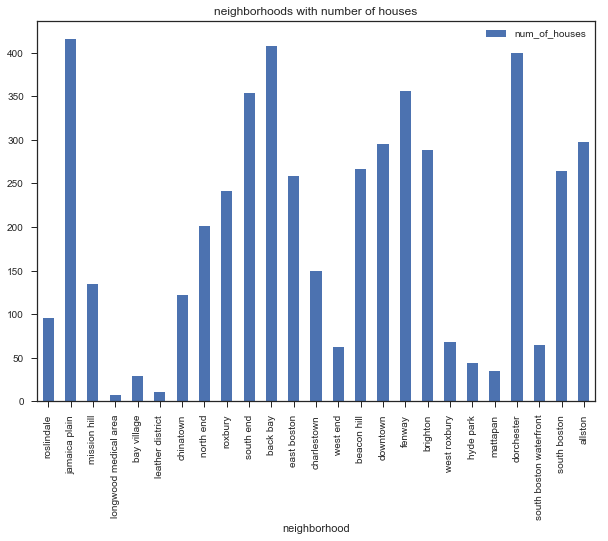

In [233]:
c.execute('''
            SELECT n.neighborhood, COUNT(f.listing_id) as number_of_houses
            FROM  fact_table f 
            JOIN neighborhoods n ON f.neighborhood_id = n.id
            GROUP BY f.neighborhood_id
            
        ''')
dataframe = pd.DataFrame(data = c.fetchall(), 
                         columns = ['neighborhood', 'num_of_houses'])
dataframe.plot.bar(x='neighborhood', 
                   title='neighborhoods with number of houses',
                   figsize=(10,7))

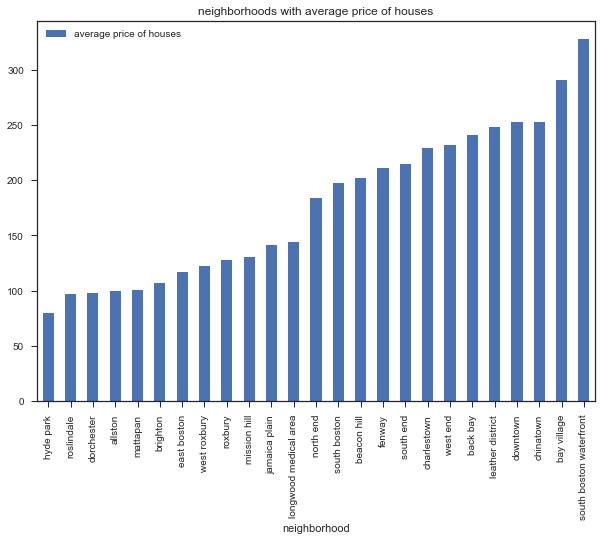

In [234]:
c.execute('''
            SELECT n.neighborhood, AVG(price) as average_price
            FROM fact_table f JOIN listings l ON f.listing_id = l.id
            JOIN neighborhoods n ON f.neighborhood_id = n.id
            GROUP BY f.neighborhood_id
            ORDER BY average_price
        ''')
dataframe = pd.DataFrame(data = c.fetchall(), columns = ['neighborhood', 'average price of houses'])
dataframe.plot.bar(x='neighborhood', title='neighborhoods with average price of houses', figsize=(10,7))

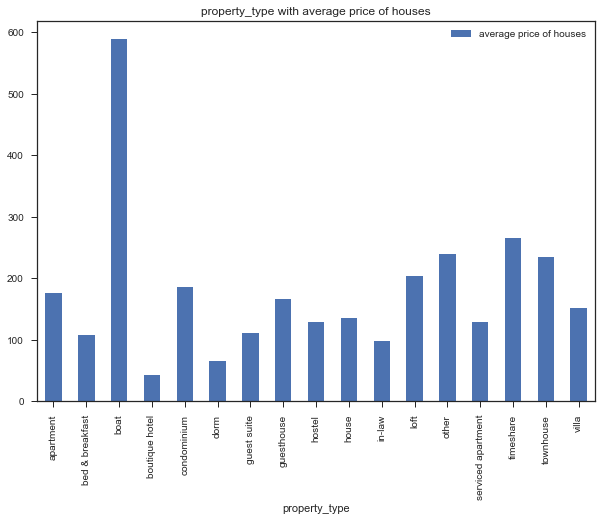

In [235]:
c.execute('''
SELECT property_type, AVG(price) as average_price
FROM listings
GROUP BY property_type
        ''')
dataframe = pd.DataFrame(data = c.fetchall(), columns = ['property_type', 'average price of houses'])
dataframe.plot.bar(x='property_type', title='property_type with average price of houses', figsize=(10,7))

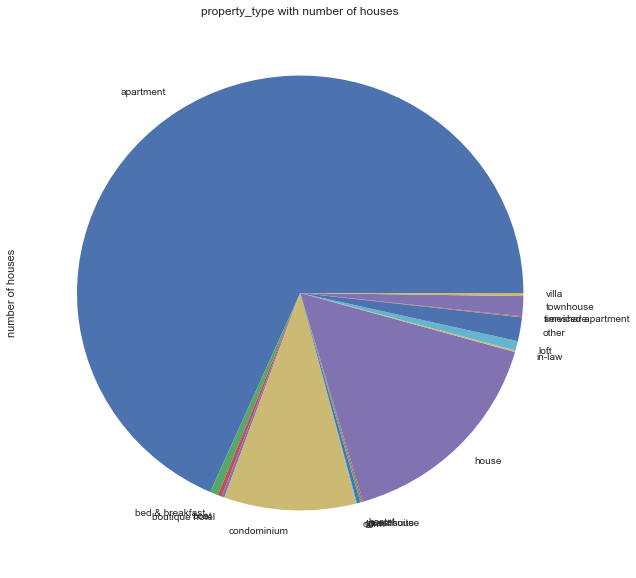

In [236]:
# number of property_types
c.execute('''
SELECT property_type, COUNT(id) as num_of_houses
FROM listings
GROUP BY property_type
        ''')
dataframe = pd.DataFrame(data = c.fetchall(), columns = ['property_type', 'number of houses'])
dataframe['number of houses'].plot.pie(labels = dataframe['property_type'], title = "property_type with number of houses", 
                      figsize = (10, 10))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x124b9dcc0>], dtype=object)

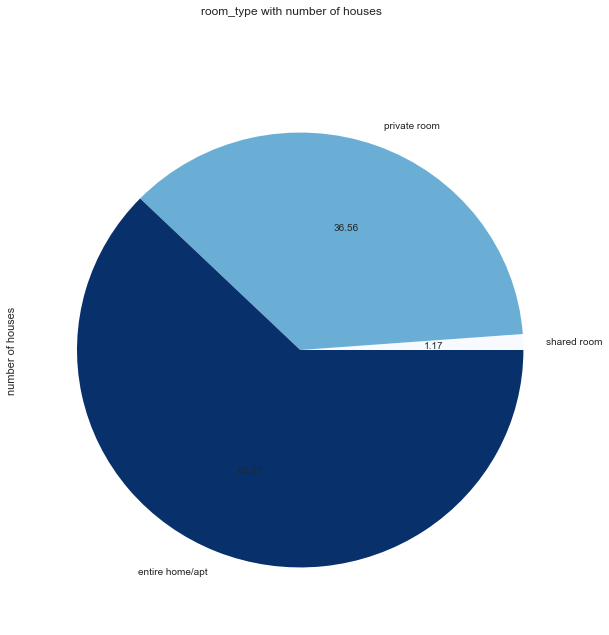

In [237]:
c.execute('''
SELECT room_type, Count(id) as c
FROM listings
GROUP BY room_type
ORDER BY c
        ''')
dataframe = pd.DataFrame(data = c.fetchall(), columns = ['room_type', 'number of houses'])
dataframe
dataframe['number of houses'].plot.pie(labels = dataframe['room_type'],subplots=True,
                   title='room_type with number of houses', figsize=(10,10),
                                       colormap = 'Blues', autopct = '%.2f', )

In [288]:
label = ['mean_price_Jan','mean_price_Feb','mean_price_Mar','mean_price_Apr',
         'mean_price_May','mean_price_Jun','mean_price_Jul','mean_price_Aug',
         'mean_price_Sept','mean_price_Oct','mean_price_Nov','mean_price_Dec']
df_column = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
month = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
for i, key in enumerate(label):
    string = "SELECT {} FROM calendar ORDER BY {}".format(key, key)
    c.execute(string)
    df_column[i] =  pd.DataFrame(data = c.fetchall(), columns = ['price'])
    #print(month[i], df_column[i].shape[0])
    d = {'month':[month[i]]*int(df_column[i].shape[0])}
    
    month[i] = pd.DataFrame(data = d)
    df_column[i] = pd.concat([df_column[i], month[i]], axis = 1)
#print(df_column[1])
df = pd.concat([df_column[0], df_column[1], df_column[2], df_column[3],
          df_column[4], df_column[5], df_column[6], df_column[7],
          df_column[8],df_column[9],df_column[10], df_column[11]])
df = df[(df.T != float(0)).all(0)]
df = df[['month', 'price']]


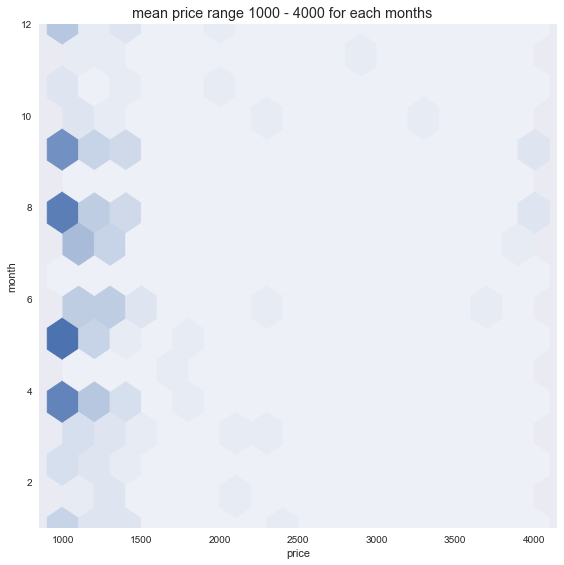

In [296]:
# Price w/ monthes
import seaborn as sns
import numpy as np
sns.set_context("poster")
sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(df,  size=8, aspect = 1, ylim = (1,12))
g.map(hexbin, "price", "month", extent=[1000, 4000, 1, 12])
#g.map(hexbin, "price", "month", extent=[100, 500, 1, 12])
plt.subplots_adjust(top=0.95)
g.fig.suptitle("mean price range 1000 - 4000 for each months")

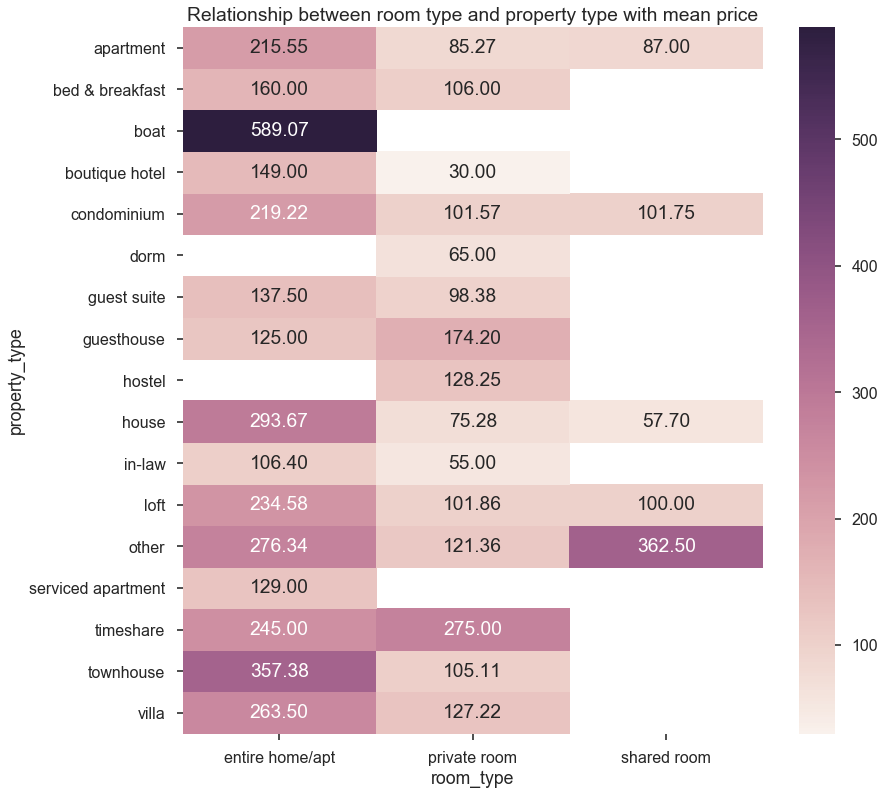

In [240]:
c.execute('''SELECT property_type, room_type, price FROM listings''')
df = pd.DataFrame(data = c.fetchall(),
                           columns = ["property_type", "room_type", "price"])
#ax = sns.heatmap(df.values)
plt.figure(figsize = (13,13))
sns.set_context("poster")

ax = sns.heatmap(df.groupby(["property_type", "room_type"]).price.mean().unstack(),
                annot = True, fmt = ".2f")
ax.set_title("Relationship between room type and property type with mean price")

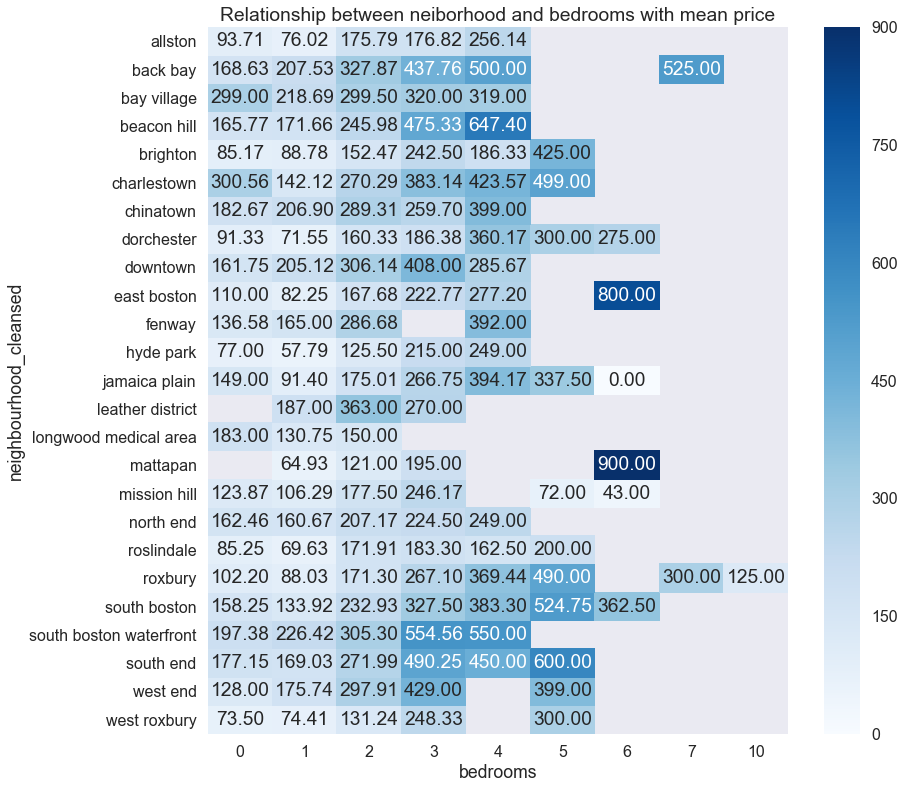

In [372]:
string = "SELECT neighbourhood_cleansed, bedrooms, price FROM listings WHERE price between 0 and 1000"
c.execute(string)
df = pd.DataFrame(data = c.fetchall(), 
                  columns = ["neighbourhood_cleansed", "bedrooms", "price"])

# df = df.pivot("neighbourhood_cleansed", "bedrooms", "count")
plt.figure(figsize = (13,13))
sns.set_context("poster")
ax = sns.heatmap(df.groupby(["neighbourhood_cleansed", "bedrooms"]).price.mean().unstack(),
                annot = True, fmt = ".2f", cmap = "Blues")
#ax = sns.heatmap(df, cmap = "Blues", annot = True, fmt = ".0f")
ax.set_title("Relationship between neiborhood and bedrooms with mean price")

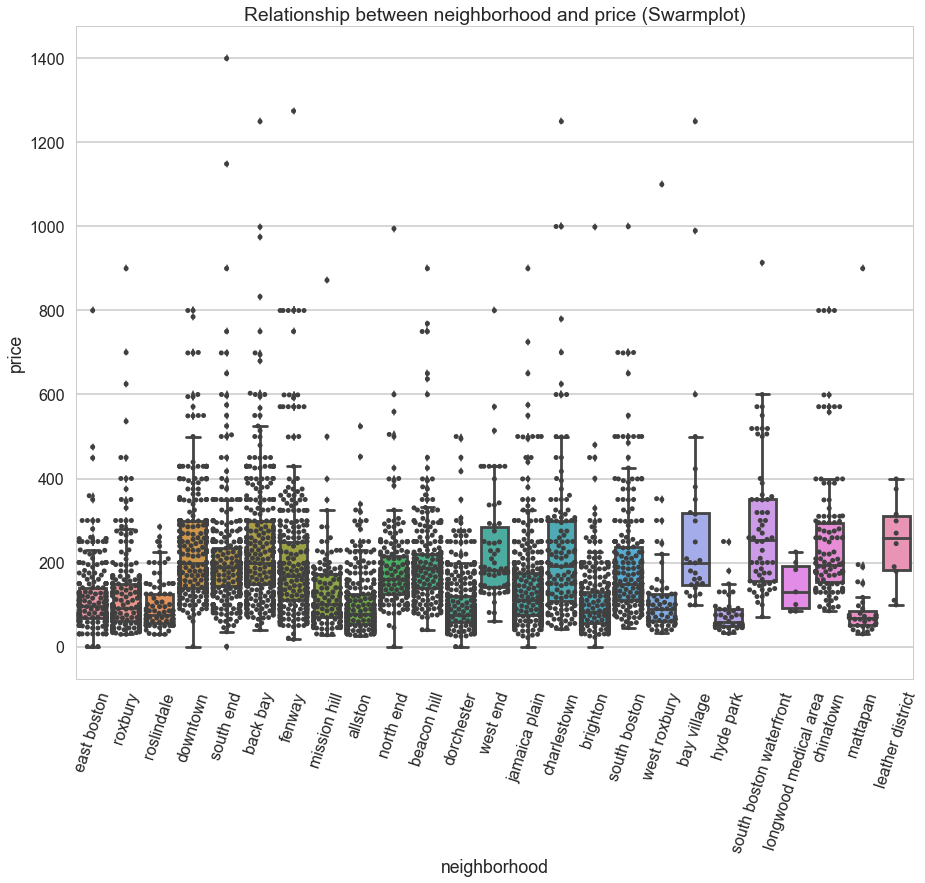

In [320]:
# neighborhood price
string =  "SELECT neighbourhood_cleansed, price From listings WHERE price between 0 and 1500"
c.execute(string)
df = pd.DataFrame(data = c.fetchall(), 
                  columns = ["neighborhood", "price"])
plt.figure(figsize = (15,12))
sns.set_context("poster")
sns.set_style("whitegrid")
ax = sns.boxplot(x="neighborhood", y="price", data=df)
ax = sns.swarmplot(x="neighborhood", y="price", data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=72)
ax.set_title("Relationship between neighborhood and price (Swarmplot)")

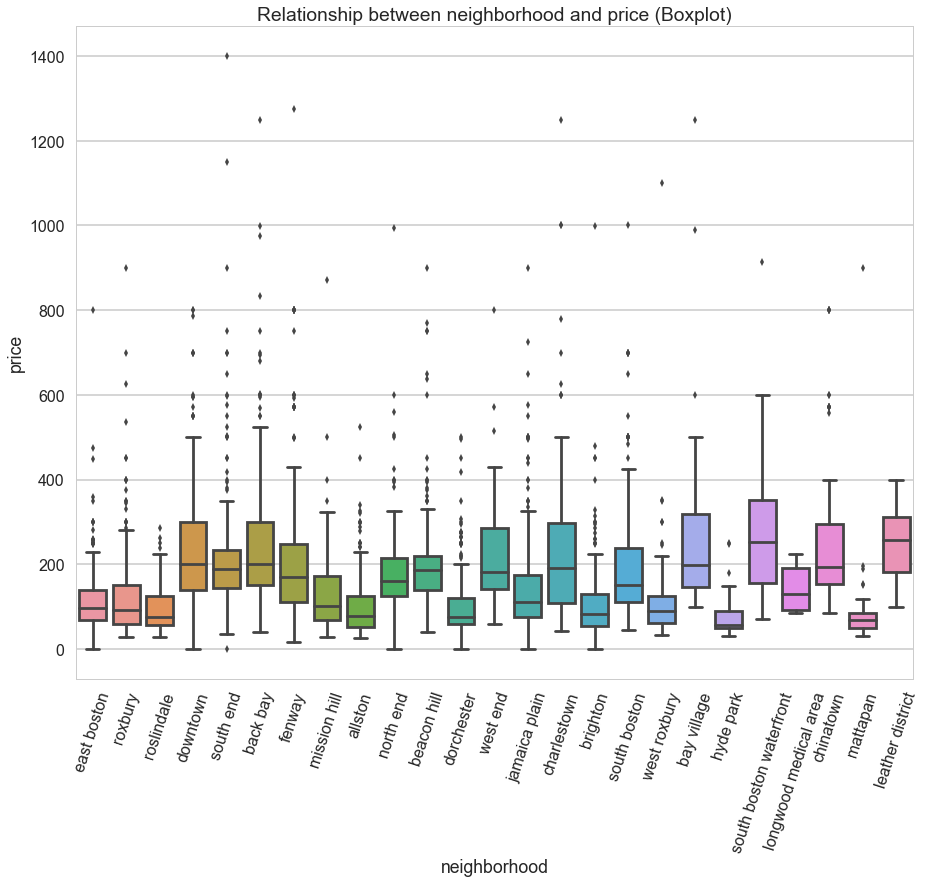

In [282]:
string =  "SELECT neighbourhood_cleansed, price From listings WHERE price between 0 and 1500"
c.execute(string)
df = pd.DataFrame(data = c.fetchall(), 
                  columns = ["neighborhood", "price"])
plt.figure(figsize = (15,12))
sns.set_context("poster")

sns.set_style("whitegrid")
ax = sns.boxplot(x="neighborhood", y="price", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=72)
ax.set_title("Relationship between neighborhood and price (Boxplot)")

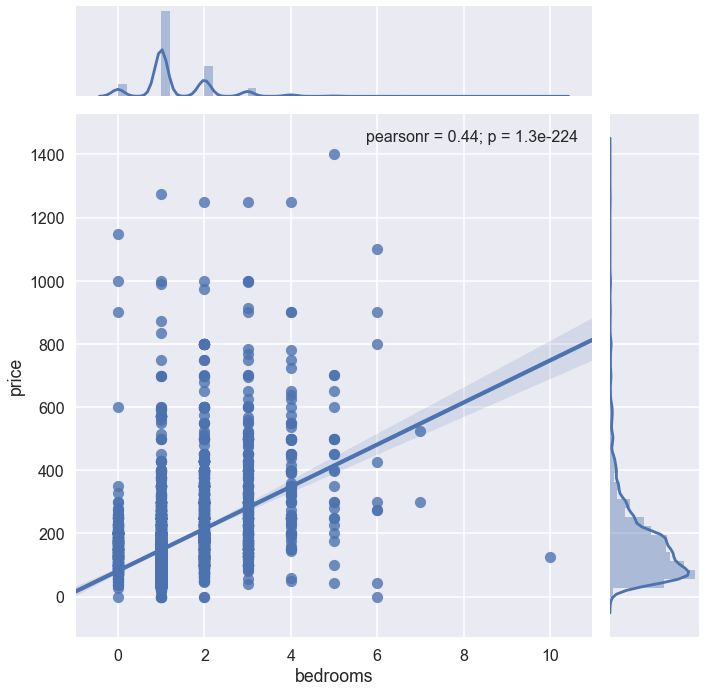

In [311]:

string = "SELECT bedrooms, price FROM listings WHERE price between 0 and 1500"
c.execute(string)
df = pd.DataFrame(data = c.fetchall(), 
                  columns = ["bedrooms", "price"])
sns.set_context("poster")
plt.figure(figsize = (12,10))

sns.set_style("darkgrid", {'axis.grid': True, 'axes.gacecolor':"0.9"})
sns.jointplot(x="bedrooms", y="price", data=df, kind="reg", size = 10)

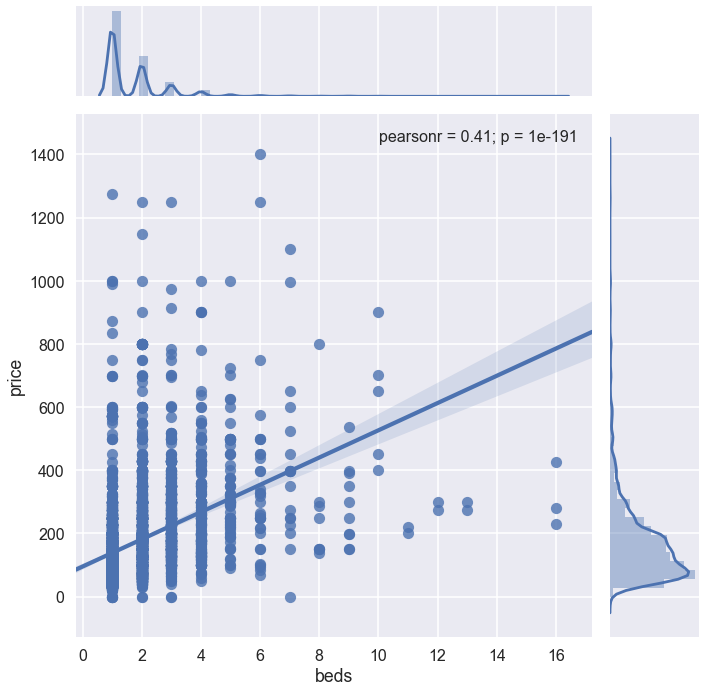

In [313]:
string = "SELECT beds, price FROM listings WHERE price between 0 and 1500"
c.execute(string)
df = pd.DataFrame(data = c.fetchall(), 
                  columns = ["beds", "price"])
sns.set_context("poster")
plt.figure(figsize = (12,10))

sns.set_style("darkgrid", {'axis.grid': True, 'axes.gacecolor':"0.9"})
sns.jointplot(x="beds", y="price", data=df, kind="reg", size = 10)

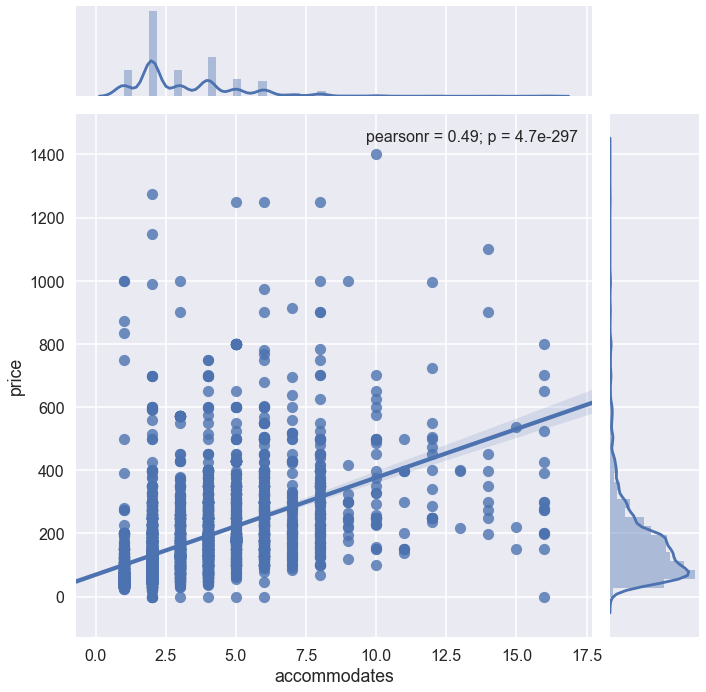

In [332]:
string = "SELECT accommodates, price FROM listings WHERE price between 0 and 1500"
c.execute(string)
df = pd.DataFrame(data = c.fetchall(), 
                  columns = ["accommodates", "price"])
sns.set_context("poster")
plt.figure(figsize = (12,10))

sns.set_style("darkgrid", {'axis.grid': True, 'axes.gacecolor':"0.9"})
sns.jointplot(x="accommodates", y="price", data=df, kind="reg", size = 10)